<a href="https://colab.research.google.com/github/Yeswanthprasad1/Yeswanthprasad1/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import models, layers, Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten
from keras.preprocessing.image import *
from tensorflow.keras.optimizers import Adam

In [ ]:
import pandas as pd
from keras.datasets import mnist


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convert to pandas DataFrame
df_train = pd.DataFrame(X_train_flat)
df_train['label'] = y_train

df_test = pd.DataFrame(X_test_flat)
df_test['label'] = y_test


In [ ]:
# Display the first few rows of the training DataFrame
print(df_train.head())

# Display the first few rows of the test DataFrame
print(df_test.head())

   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

In [ ]:
pixel_data=df_train.iloc[:,1:785] #from col 1 to 785
label=df_train["label"]

number=np.array(pixel_data)
number=number.reshape(len(pixel_data),28,28,1)

Text(0.5, 1.0, 'Value is: 5')

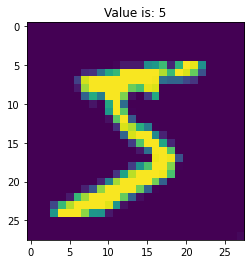

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(number[0])
plt.title("Value is: %d" % label[0])

In [ ]:
#train test split

X_train, X_test, y_train, y_test= train_test_split(number, label, train_size=0.2, random_state=42)

In [ ]:
img_data_gen=ImageDataGenerator()

model=Sequential()

model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train,epochs=25)

Epoch 1/25
375/375 [==============================] - 4s 9ms/step - loss: 2.9573 - accuracy: 0.1647
Epoch 2/25
375/375 [==============================] - 3s 9ms/step - loss: 2.0690 - accuracy: 0.2067
Epoch 3/25
375/375 [==============================] - 3s 9ms/step - loss: 2.0002 - accuracy: 0.2334
Epoch 4/25
375/375 [==============================] - 3s 9ms/step - loss: 1.8709 - accuracy: 0.2808
Epoch 5/25
375/375 [==============================] - 3s 9ms/step - loss: 1.7251 - accuracy: 0.3235
Epoch 6/25
375/375 [==============================] - 3s 9ms/step - loss: 1.6136 - accuracy: 0.3650
Epoch 7/25
375/375 [==============================] - 4s 12ms/step - loss: 1.4561 - accuracy: 0.4287
Epoch 8/25
375/375 [==============================] - 3s 9ms/step - loss: 1.2772 - accuracy: 0.5213
Epoch 9/25
375/375 [==============================] - 3s 9ms/step - loss: 1.1297 - accuracy: 0.5965
Epoch 10/25
375/375 [==============================] - 3s 9ms/step - loss: 1.0299 - accuracy: 0.636

In [ ]:
# test using validation set
y_pred = model.predict(X_test)
y_predict = [np.argmax(y_pred[i]) for i in range(len(y_pred))]

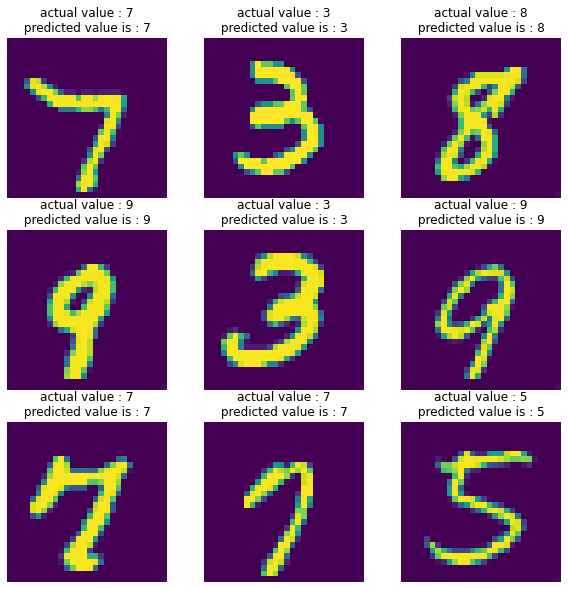

In [ ]:
y_list = y_test.to_list()
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title('actual value : %d' %y_list[i]+ '\n predicted value is : %d ' % y_predict[i])

In [ ]:
# validation accuracy to see if we're on the right track
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9714375